# Data Gathering Intro

In [8]:
import sys
!{sys.executable} -m pip install gitpython

In [9]:
ZEEGUU_API_FOLDER="/Users/mircea/Zeeguu-API"


In [11]:
ZEEGUU_CORE_FOLDER="/Users/mircea/Zeeguu-Core"

In [10]:
from git import Repo

Repo.clone_from("https://github.com/zeeguu-ecosystem/Zeeguu-api",ZEEGUU_API_FOLDER )


GitCommandError: ignored

In [21]:
Repo.clone_from("https://github.com/zeeguu-ecosystem/Zeeguu-Core",ZEEGUU_CORE_FOLDER )

<git.repo.base.Repo '/Users/mircea/Zeeguu-Core/.git'>

In [22]:
repo = Repo(ZEEGUU_CORE_FOLDER)

## Let's find the largest python file in the repository

In [23]:
!{sys.executable} -m pip install pathlib

In [24]:
from pathlib import Path
files = []
for file in Path(ZEEGUU_API_FOLDER).rglob("*.py"):
    print(file)
    files.append(file)
    
print(len(files))

/Users/mircea/Zeeguu-API/env_var_defs_default.py
/Users/mircea/Zeeguu-API/setup.py
/Users/mircea/Zeeguu-API/zeeguu_core/__init__.py
/Users/mircea/Zeeguu-API/zeeguu_core/constants.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/__init__.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/__init__.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/arts_base.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/algorithm_wrapper.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/ab_testing.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/bookmark_priority_updater.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/arts_rt.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/words_to_study.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/tools/__init__.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/tools/algo_parameter_approximator.py
/Users/mircea/Zeeguu-API/zeeguu_core/word_scheduling/arts/

In [25]:
def LOC(file):
    return sum([1 for line in open(file)])

LOC(ZEEGUU_CORE_FOLDER+'/zeeguu_core_test/rules/user_rule.py')
    

56

In [26]:
def NOM(file):
    # number of methods
    pass

In [27]:
files = Path(ZEEGUU_CORE_FOLDER).rglob("*.py")

print(max([(f,LOC(str(f))) for f in files], key= lambda x: x[1]))

(PosixPath('/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py'), 680)


In [28]:
from pathlib import Path

files_and_LOCs = []
for file in Path(ZEEGUU_CORE_FOLDER).rglob("*.py"):
    files_and_LOCs.append( 
        (LOC(str(file)),
         str(file)
        )
    )

files_and_LOCs.sort(key = lambda x: -x[0])
for each in files_and_LOCs:
    print (str(each[0]) + " " + str(each [1]))

680 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py
478 /Users/mircea/Zeeguu-Core/zeeguu_core/word_scheduling/arts/tools/algo_parameter_approximator.py
403 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_reading_session.py
347 /Users/mircea/Zeeguu-Core/zeeguu_core/content_recommender/mixed_recommender.py
332 /Users/mircea/Zeeguu-Core/zeeguu_core/model/bookmark.py
310 /Users/mircea/Zeeguu-Core/zeeguu_core/content_retriever/article_downloader.py
298 /Users/mircea/Zeeguu-Core/zeeguu_core/model/article.py
287 /Users/mircea/Zeeguu-Core/zeeguu_core/language/strategies/word_history_difficulty_estimator.py
280 /Users/mircea/Zeeguu-Core/zeeguu_core/model/word_knowledge/word_interaction_history.py
266 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_article.py
257 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_activitiy_data.py
255 /Users/mircea/Zeeguu-Core/zeeguu_core/model/feed.py
238 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_exercise_session.py
218 /Users/mircea/Zeeguu-Core/zeeg

In [29]:
def size_of_all_files(sizes_and_files):
    pass

## Recovering Module Views

- modules & dependencies between them
  - modules are easy
  - how to extract the **dependencies**?

In [30]:
lines = [line for line in open(ZEEGUU_CORE_FOLDER+'/zeeguu_core/model/user.py')]

for line in lines[:10]:    
    print(line)

#

import datetime

import json

import random

import re



import sqlalchemy.orm

import zeeguu_core

from sqlalchemy import Column, ForeignKey, Integer, func

from sqlalchemy.orm import relationship



In [31]:
import re

def extract_import_from_line(line):
    # TODO: think about how to detect imports when
    # they are inside a function / method
    x = re.search("^import (\S+)", line) 
    x = re.search("^from (\S+)", line) 
    return x.group(1)

extract_import_from_line('from sqlalchemy import Column, ForeignKey, Integer, func')




'sqlalchemy'

In [32]:
def imports(file):
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

print(imports(ZEEGUU_CORE_FOLDER+'/zeeguu_core/model/user.py'))

['sqlalchemy', 'sqlalchemy.orm', 'sqlalchemy.orm.exc', 'zeeguu_core', 'zeeguu_core.language.difficulty_estimator_factory', 'zeeguu_core.model']


## Extracting module from file name

/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py 
->
zeeguu_core.model.user



In [33]:
def module_from_file_path(folder_prefix, full_path):
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(ZEEGUU_CORE_FOLDER, full_path)

module(ZEEGUU_CORE_FOLDER+'/zeeguu_core/model/user.py')

'.zeeguu_core.model.user'

In [34]:
!{sys.executable} -m pip install networkx --upgrade
!{sys.executable} -m pip install matplotlib

Requirement already up-to-date: networkx in /usr/local/lib/python3.7/dist-packages (2.5.1)


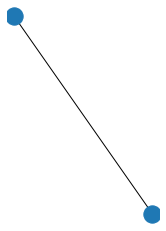

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node(1)
G.add_node(1)
G.add_node(2)

G.add_edge(1, 2)

plt.subplot(121)
nx.draw(G, font_weight='bold')
plt.show()

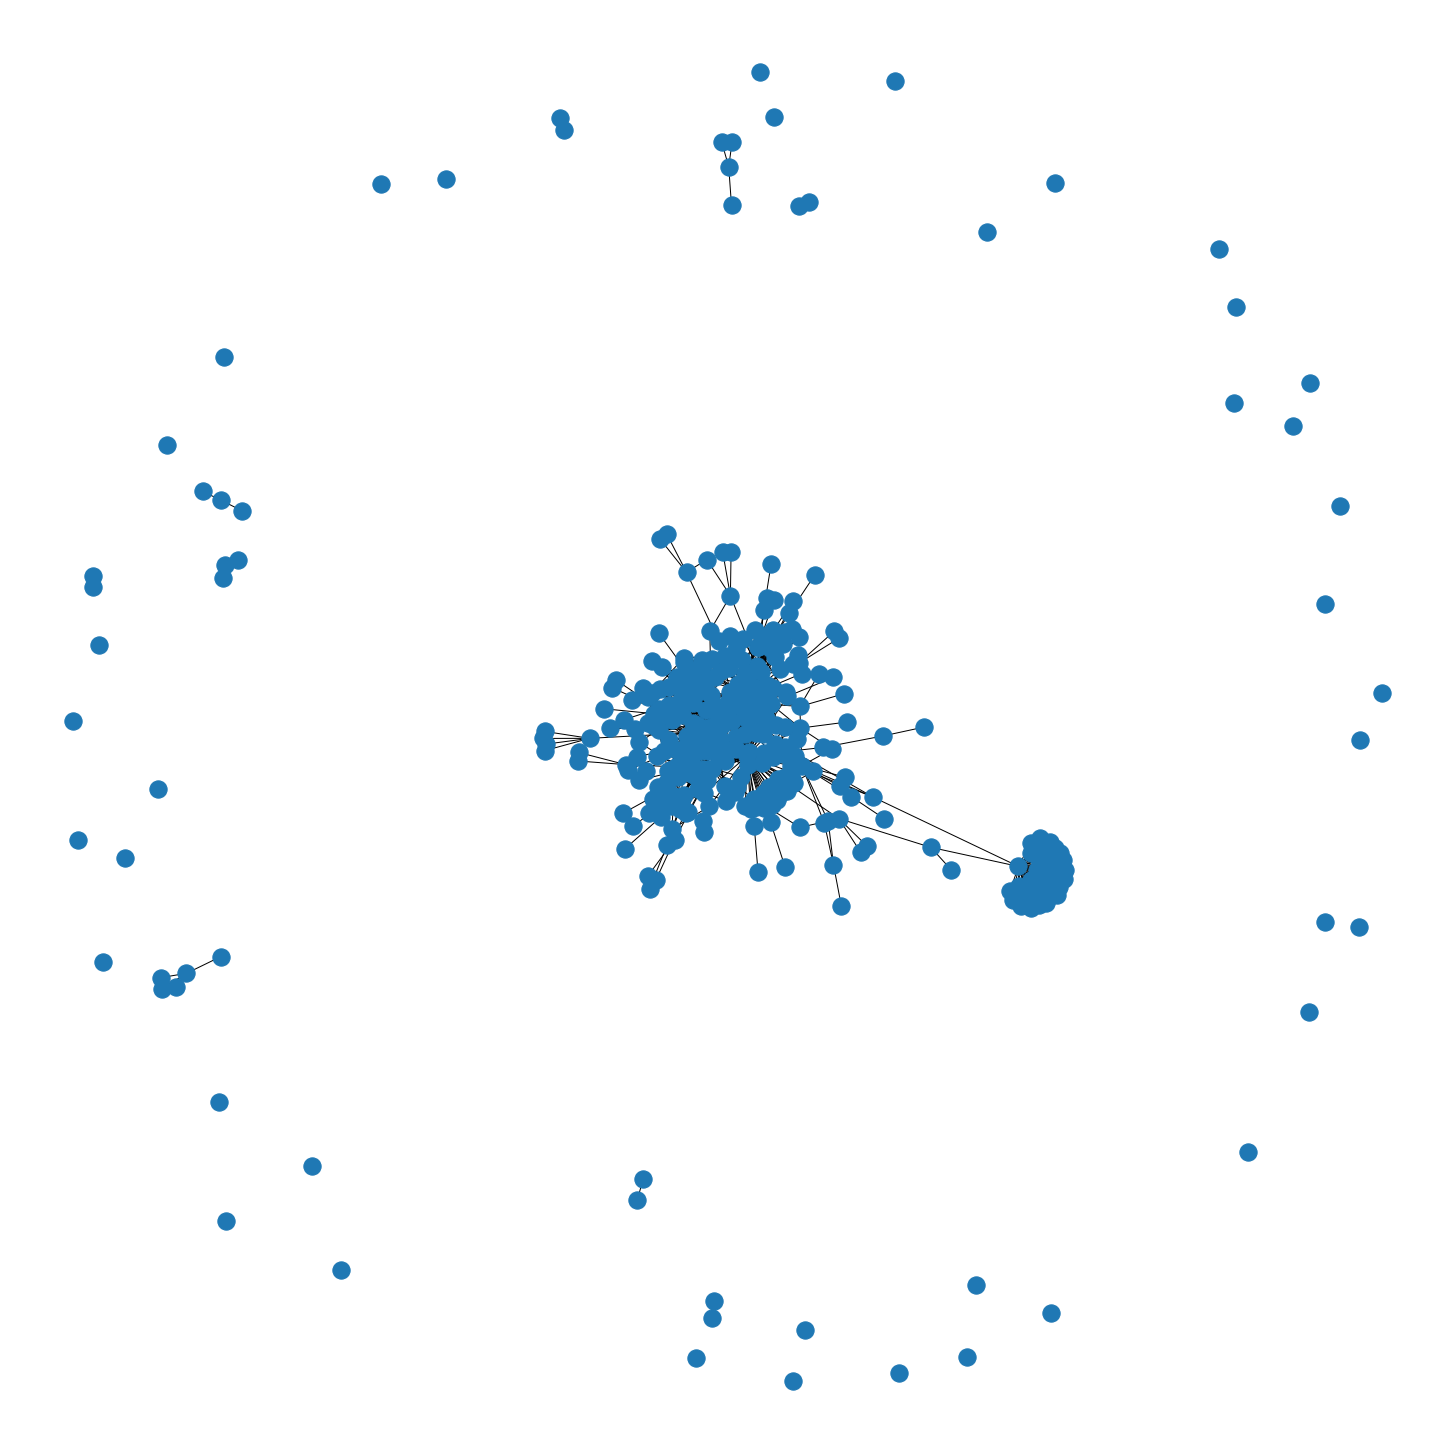

In [36]:
files = Path(ZEEGUU_CORE_FOLDER).rglob("*.py")

G = nx.Graph()

for file in files:
    m = module(str(file))
    if m not in G.nodes:
        G.add_node(m)
    
    for each in imports(str(file)):
        G.add_edge(m, each)
        

plt.figure(figsize=(20,20))
nx.draw(G, font_weight='bold')
plt.show()
    
    
